In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 

In [ ]:
!pip install cython pyyaml==5.1

In [ ]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

In [4]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.5.0+cu101 True


In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [0]:
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [8]:
pwd

'/content'

In [9]:
cd sample_data/

/content/sample_data


In [10]:
%%time
#!rm -r frames/*
!mkdir frames4/

#specify path to video
video = "VR_Mall.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames4/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

CPU times: user 23 s, sys: 567 ms, total: 23.6 s
Wall time: 24.5 s


In [11]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

30.416270368492537


In [12]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:14, 9.06MB/s]                           


In [0]:
img = cv2.imread("frames4/30.png")

#pass to the model
outputs = predictor(img)

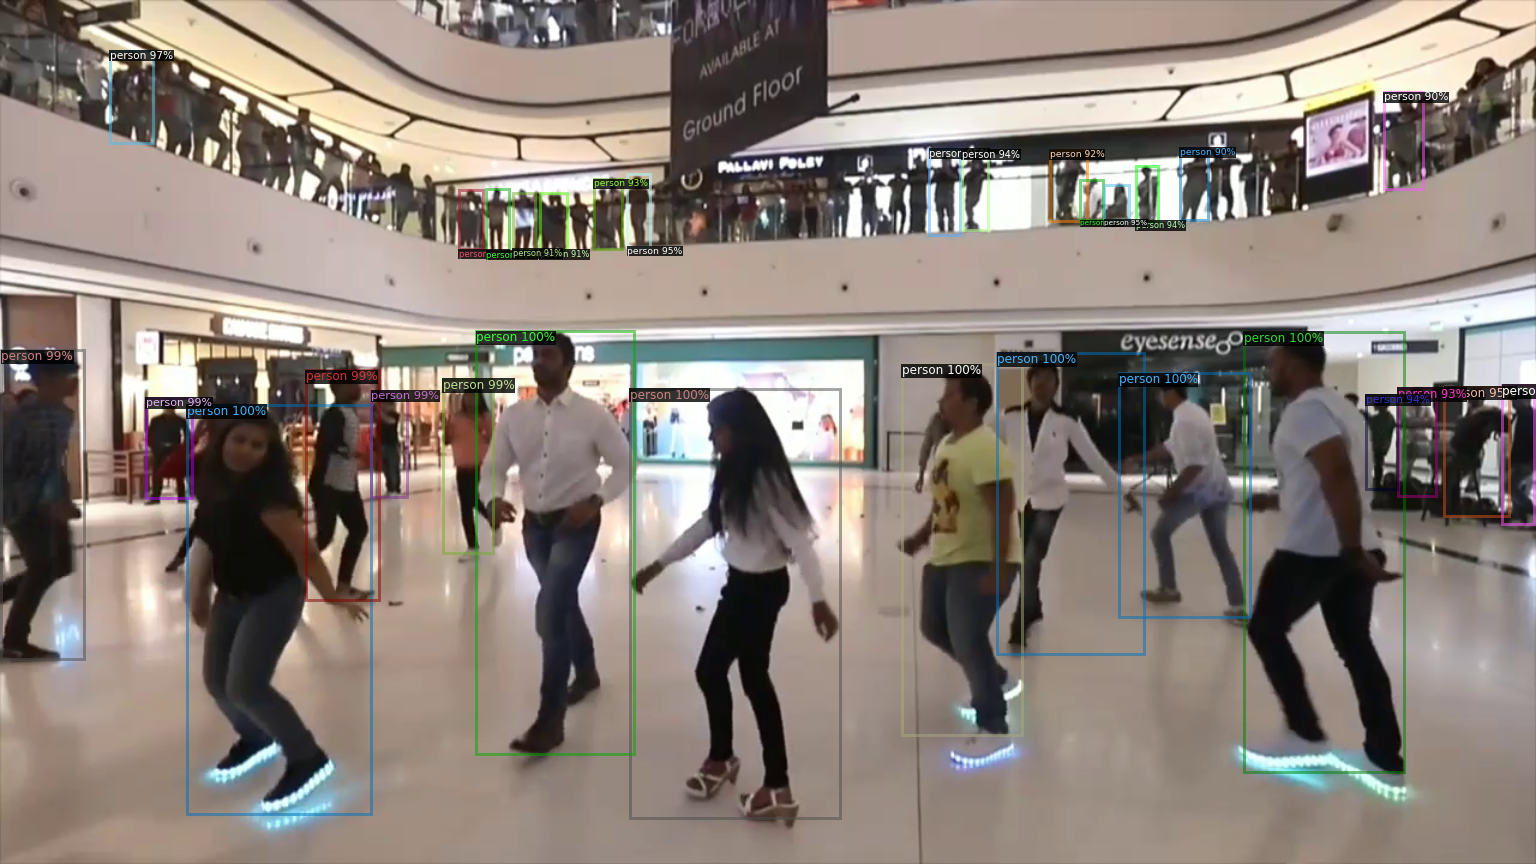

In [14]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [15]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[5.24950439e+02 3.24308716e+02 7.00050171e+02 6.81801147e+02]
 [1.03651331e+03 2.77293396e+02 1.17039575e+03 6.43086487e+02]
 [3.96883667e+02 2.76796814e+02 5.28189331e+02 6.28794189e+02]
 [9.32137024e+02 3.11765015e+02 1.04207129e+03 5.14406189e+02]
 [1.55683762e+02 3.38096710e+02 3.09415588e+02 6.78413086e+02]
 [7.51475525e+02 3.04241943e+02 8.51512939e+02 6.13050232e+02]
 [8.31069092e+02 2.94683594e+02 9.53428894e+02 5.45241272e+02]
 [1.18210578e+00 2.92657379e+02 6.99415665e+01 5.49323669e+02]
 [3.68801178e+02 3.16549500e+02 4.10969513e+02 4.60948242e+02]
 [2.54681671e+02 3.09234833e+02 3.16110138e+02 5.00094421e+02]
 [1.21659950e+02 3.32317322e+02 1.60132874e+02 4.15424988e+02]
 [3.09386841e+02 3.26472809e+02 3.39083649e+02 4.14716858e+02]
 [9.14209366e+01 4.31752243e+01 1.27797951e+02 1.20159782e+02]
 [1.25206018e+03 3.21471954e+02 1.27815076e+03 4.37447632e+02]
 [1.20372437e+03 3.22699890e+02 1.25713062e+03 4.30641937e+02]
 [9.00304443e+02 1.50652054e+02 9.19474854e+02 1.842838

In [0]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [18]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

524.95044 324.30872 700.0502 681.80115


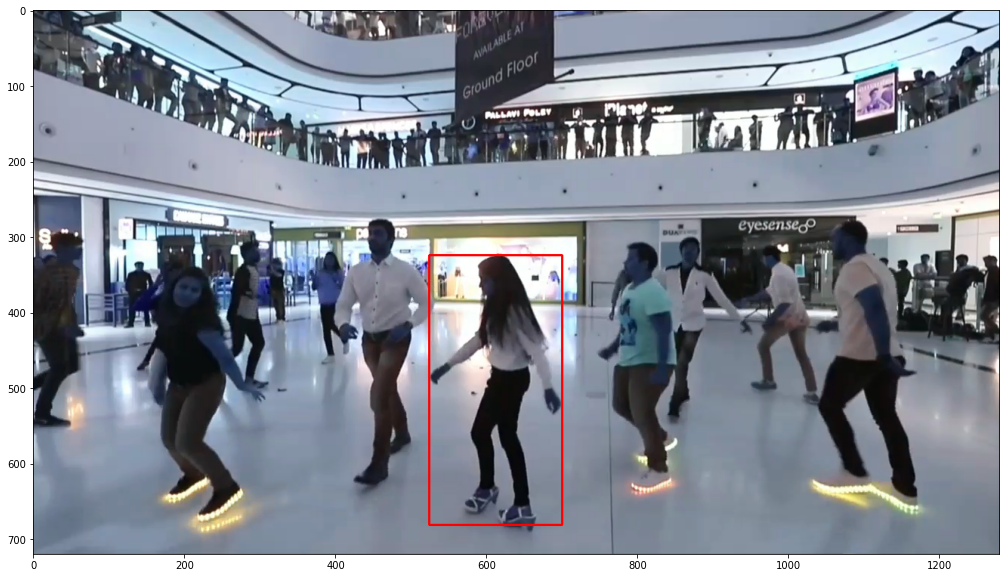

In [19]:
img = cv2.imread('frames4/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

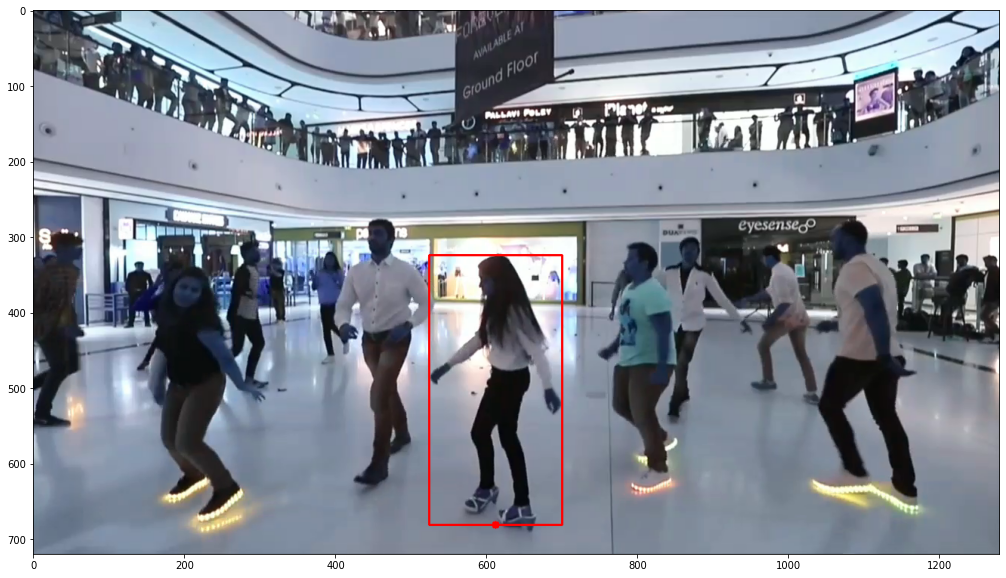

In [20]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

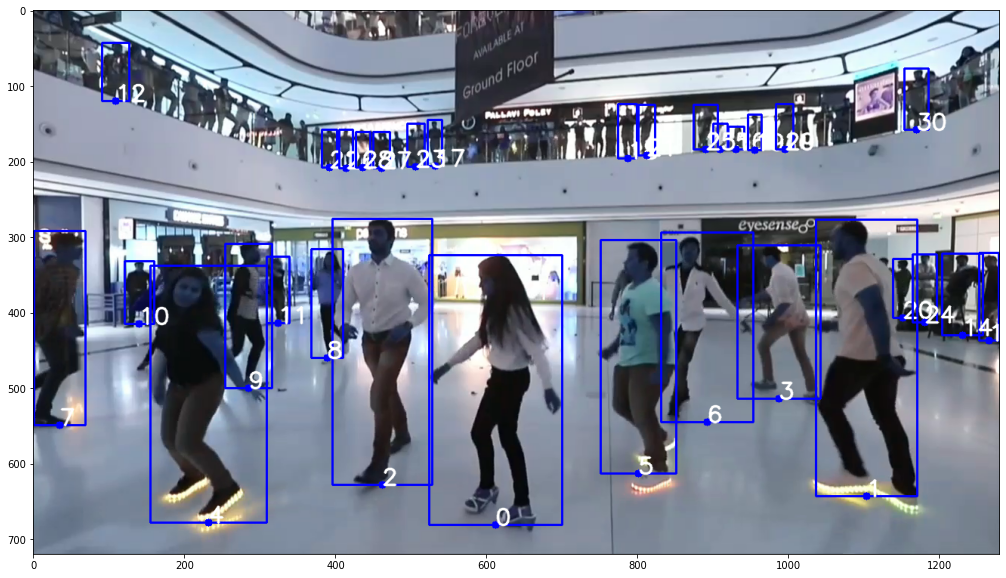

In [22]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [23]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 57.5 ms, sys: 8.96 ms, total: 66.5 ms
Wall time: 68.5 ms


In [0]:
dist= compute_distance(midpoints,num)

In [25]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs


In [26]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

p1  p2       dist
0    3   6  99.929975
1    8  11  79.630396
2    9  11  94.429868
3   13  14  35.693137
4   13  24  88.323270
5   14  20  82.280010
6   14  24  52.810984
7   15  16  21.000000
8   15  19  46.010868
9   15  21  97.329338
10  15  25  19.000000
11  15  29  86.000000
12  16  19  25.019992
13  16  25  40.000000
14  16  29  65.000000
15  17  23  26.019224
16  17  27  71.063352
17  17  28  96.020831
18  18  21  25.317978
19  19  25  65.007692
20  19  29  40.012498
21  20  24  29.614186
22  21  25  78.409183
23  22  26  22.022716
24  22  27  69.007246
25  22  28  44.000000
26  23  26  92.021737
27  23  27  45.044423
28  23  28  70.007142
29  26  27  47.000000
30  26  28  22.022716
31  27  28  25.019992

In [0]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

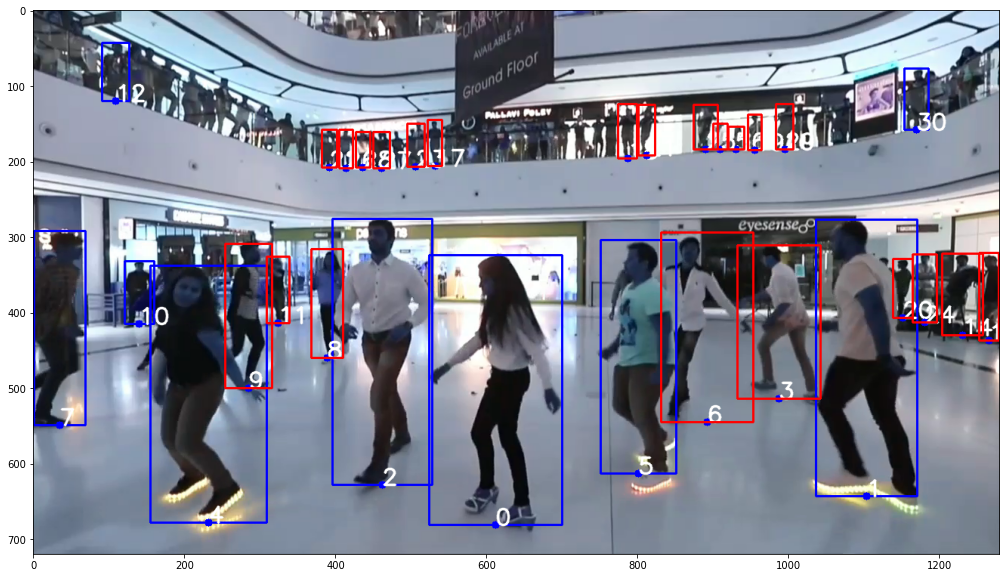

In [28]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
import os
import re

names=os.listdir('frames4/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [0]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames4/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames4/'+name,img)
  return 0

In [34]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]


100%|██████████| 525/525 [05:12<00:00,  1.68it/s]


In [35]:

%%time
frames = os.listdir('frames4/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames4/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('VR_Mall_Model1.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 14.4 s, sys: 1.7 s, total: 16.1 s
Wall time: 15.5 s
